In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
infile = 'Ubirajara - twitter user tagging - Sheet1.csv'

In [3]:
firstline = True
tuples = []

with open(infile) as f:
    for line in f:
        if firstline:
            firstline = False
            continue
        else:
            if (line[0:10].lower()=='community '):
                community = int(line[10:-3])
            else:
                if(len(line)>2):
                    try:
                        username, label = line.strip().split(',')
                    except ValueError:
                        username, label1, label2 = line.strip().split(',')
                        label = label1+' / '+label2
                        
                    tuples.append( (community, username, label) )
                    
df = pd.DataFrame(tuples, columns=['community','username','label'])

In [4]:
df.sample(10)

,community,username,label
110,11,bioriderjr,unknown / personal
140,14,mikannn,journalist
1,0,tito_aureliano,paleontology
24,2,PodcastUru,science communication
163,16,felipecapoccia,art
48,4,sadtheropod,art
161,16,CesarFavacho,science communication
35,3,marciolcastro,paleontology/art
3,0,ruzzibarbara,science
96,9,folha,press


In [5]:
df.label.value_counts()

unknown / personal                    56
paleontology                          24
science                               14
art                                   14
science communication                 12
deleted                                8
-                                      6
press                                  5
paleontology/art                       5
science journalism                     5
politics                               3
paleontology/science communicator      2
paleontology/science communication     2
journalist                             2
Music                                  1
paleontology/law                       1
architecture                           1
university                             1
artist                                 1
bot                                    1
influencer                             1
science communicator                   1
Science communicator                   1
science institution                    1
paleontology /  

In [29]:
sorted(df.label.unique())

['-',
 'Music',
 'Science communicator',
 'architecture',
 'art',
 'artist',
 'bot',
 'deleted',
 'influencer',
 'journalist',
 'paleontology',
 'paleontology /  art',
 'paleontology/art',
 'paleontology/law',
 'paleontology/science communication',
 'paleontology/science communicator',
 'politics',
 'press',
 'science',
 'science communication',
 'science communicator',
 'science institution',
 'science journalism',
 'science journalist',
 'university',
 'unknown / personal']

In [36]:
def merge(s):
    x = s.lower()
    if 'paleontology' in x: 
        out = 'paleontology' # this counts any paleo person as paleo
    elif x in ['art','artist']:
        out = 'art'
    elif x in ['science communication','science communicator']:
        out = 'science communication'
    elif x in ['science journalism','science journalist']:
        out = 'science journalism'
    elif x in ['unknown / personal']:
        out = 'personal'
    elif x in ['journalist','press']:
        out = 'press'
    elif x in ['science institution','university']:
        out = 'institution'
    elif x in ['-','deleted','bot','music','architecture','influencer']:
        out = 'other'
    else:
        out = x
    return out.title()

In [124]:
df.label = df.label.apply(merge)

In [125]:
df.label.value_counts()

Personal                 56
Paleontology             35
Other                    18
Art                      15
Science                  14
Science Communication    14
Press                     7
Science Journalism        6
Politics                  3
Institution               2
Name: label, dtype: int64

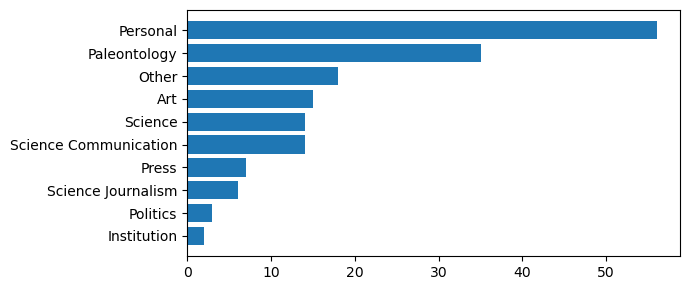

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
d = df.label.apply(merge).value_counts()
data   = d.values
labels = d.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
fig, ax = plt.subplots(figsize=(7,3))
y = range(len(d))
ax.barh(y=y, width=d.values[::-1])
ax.set_yticks(y)
ax.set_yticklabels(labels[::-1])

plt.tight_layout()
plt.show()

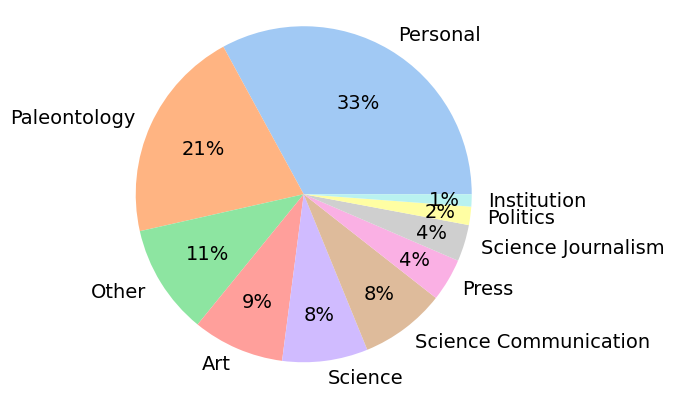

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
d = df.label.apply(merge).value_counts()
data   = d.values
labels = d.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
w,l,p = plt.pie(data, labels = labels, colors = colors,
        autopct='%.0f%%',  textprops={'fontsize': 14}, pctdistance=0.7,
        labeldistance=1.1)

pctdists = np.linspace(0.9,1.2,10)

for t,d in zip(p, pctdists):
    xi,yi = t.get_position()
    ri = np.sqrt(xi**2+yi**2)
    phi = np.arctan2(yi,xi)
    x = d*ri*np.cos(phi)
    y = d*ri*np.sin(phi)
    t.set_position((x,y))

plt.axis('equal')
plt.show()

In [93]:
x = [[0,1],[1,1],[2,1],[3,1],[4,1],[5,1],[6,1],[7,151],[8,1],[9,1],[10,1],[11,2],[12,168],[13,1],[14,1],[15,1],[16,1],[17,1],[18,1],[19,1],[20,1],[21,1],[22,2],[23,702],[24,1710],[25,1],[26,1],[27,1],[28,674],[29,3],[30,1],[31,1],[32,1],[33,1],[34,2599],[35,1],[36,1],[37,1],[38,2],[39,1],[40,1],[41,1],[42,1],[43,1],[44,1],[45,2],[46,1],[47,1],[48,1],[49,1],[50,1],[51,1],[52,1],[53,176],[54,1],[55,1],[56,1],[57,1],[58,1],[59,1],[60,647],[61,1],[62,2],[63,2],[64,1],[65,1],[66,1],[67,1],[68,1],[69,2],[70,1],[71,2],[72,1],[73,1],[74,1],[75,1],[76,1],[77,1],[78,1],[79,1],[80,1],[81,1],[82,1],[83,1],[84,1],[85,1],[86,1],[87,1],[88,1],[89,1],[90,1],[91,2],[92,1],[93,1],[94,3],[95,1],[96,1],[97,1],[98,1],[99,1],[100,1],[101,1],[102,1],[103,1],[104,1],[105,1],[106,1],[107,1],[108,1],[109,1],[110,1],[111,1],[112,1],[113,1],[114,1],[115,3],[116,1],[117,1],[118,1],[119,1],[120,1],[121,1],[122,1],[123,1],[124,1],[125,3],[126,1],[127,1],[128,1],[129,1],[130,1],[131,1],[132,1],[133,1],[134,1],[135,1],[136,3],[137,1],[138,1],[139,1],[140,1],[141,1],[142,1],[143,1],[144,1],[145,1],[146,1],[147,2],[148,1],[149,1],[150,1],[151,1],[152,1],[153,2],[154,2],[155,1],[156,1],[157,1],[158,1],[159,1],[160,1],[161,1],[162,1],[163,1],[164,1],[165,1],[166,1],[167,1],[168,1],[169,1],[170,2],[171,1],[172,1],[173,1],[174,1],[175,1],[176,1],[177,1],[178,1],[179,1],[180,1],[181,1],[182,1],[183,1],[184,1],[185,1],[186,1],[187,1],[188,1],[189,1],[190,1],[191,1],[192,1],[193,1],[194,1],[195,1],[196,1],[197,1],[198,1],[199,1],[200,1],[201,2],[202,1],[203,1],[204,1],[205,1],[206,1],[207,1],[208,1],[209,1],[210,1],[211,1],[212,2],[213,1],[214,1],[215,1],[216,1],[217,1],[218,1],[219,1],[220,1],[221,1],[222,1],[223,1],[224,1],[225,2],[226,1],[227,192],[228,1],[229,1],[230,1],[231,1],[232,2],[233,1],[234,1],[235,1],[236,1],[237,1],[238,1],[239,1],[240,1],[241,1],[242,1],[243,1],[244,1],[245,1],[246,1],[247,1],[248,1],[249,1],[250,1],[251,1],[252,1],[253,235],[254,1],[255,1],[256,1],[257,1],[258,1],[259,1],[260,1],[261,1],[262,1],[263,1],[264,1],[265,1],[266,1],[267,1],[268,1],[269,1],[270,1],[271,1],[272,1],[273,1],[274,1],[275,1],[276,1],[277,1],[278,1],[279,1],[280,1],[281,1],[282,2],[283,1],[284,5],[285,1],[286,1],[287,1],[288,1],[289,1],[290,2],[291,1],[292,1],[293,1],[294,2],[295,1],[296,2],[297,3],[298,1],[299,1],[300,1],[301,1],[302,1],[303,1],[304,1],[305,1],[306,1],[307,1],[308,1],[309,1],[310,1],[311,1],[312,2],[313,1],[314,1],[315,1],[316,1],[317,1],[318,1],[319,1],[320,1],[321,1],[322,1],[323,1],[324,1],[325,1],[326,1],[327,1],[328,1],[329,1],[330,1],[331,1],[332,1],[333,1],[334,1],[335,1],[336,2],[337,1],[338,1],[339,1],[340,1],[341,1],[342,1],[343,1],[344,1],[345,1],[346,1],[347,1],[348,2],[349,1],[350,1],[351,1],[352,1],[353,1],[354,1],[355,1],[356,1],[357,1],[358,1],[359,1],[360,1],[361,1],[362,1],[363,1],[364,1],[365,1],[366,2],[367,83],[368,1],[369,1],[370,2],[371,1],[372,2],[373,1],[374,2],[375,1],[376,1],[377,1],[378,1],[379,1],[380,1],[381,1],[382,1],[383,1],[384,1],[385,1],[386,1],[387,2],[388,1],[389,1],[390,1],[391,1],[392,1],[393,1],[394,1],[395,1],[396,1],[397,1],[398,1],[399,1],[400,1],[401,1],[402,1],[403,1],[404,1],[405,1],[406,2],[407,1],[408,1],[409,1],[410,1],[411,1],[412,1],[413,1],[414,1],[415,1],[416,1],[417,1],[418,1],[419,1],[420,1],[421,1],[422,1],[423,1],[424,1],[425,1],[426,1],[427,1],[428,1],[429,1],[430,1],[431,1],[432,1],[433,1],[434,1],[435,1],[436,1],[437,1],[438,214],[439,1],[440,2],[441,1],[442,1],[443,7],[444,1],[445,1],[446,1],[447,1],[448,1],[449,1],[450,1],[451,1],[452,1],[453,3],[454,1],[455,1],[456,1],[457,267],[458,1],[459,1],[460,1],[461,1],[462,1],[463,1],[464,1],[465,1],[466,1],[467,1],[468,1],[469,3064],[470,1],[471,2],[472,1],[473,1],[474,1],[475,1],[476,1],[477,2],[478,1],[479,1],[480,1],[481,1],[482,1],[483,1],[484,1],[485,1],[486,3],[487,1],[488,1],[489,1],[490,1],[491,787],[492,1],[493,2],[494,1],[495,1],[496,1],[497,1],[498,1],[499,1],[500,1],[501,1],[502,1],[503,1],[504,1],[505,1],[506,1],[507,1],[508,1],[509,1],[510,1],[511,1],[512,1],[513,1],[514,1],[515,1],[516,1],[517,2],[518,1],[519,1],[520,1],[521,1],[522,1],[523,1036],[524,1],[525,1],[526,2],[527,1],[528,1],[529,1],[530,1],[531,1],[532,3],[533,1],[534,1],[535,1],[536,1],[537,1],[538,1],[539,1],[540,1],[541,1],[542,1],[543,176],[544,3],[545,1],[546,1],[547,1],[548,1]]

In [192]:
comm_sizes = {i:j for i,j in x if j > 100}
cols = ['Gephi modularity value','number of members']
d = pd.DataFrame([(i,j) for i,j in sorted(comm_sizes.items(), key=lambda x:x[1])[::-1]], columns=cols)

d.head(20)

,Gephi modularity value,number of members
0,469,3064
1,34,2599
2,24,1710
3,523,1036
4,491,787
5,23,702
6,28,674
7,60,647
8,457,267
9,253,235


In [193]:
comm_sizes = { idx:row['number of members'] for idx,row in d.iterrows() }

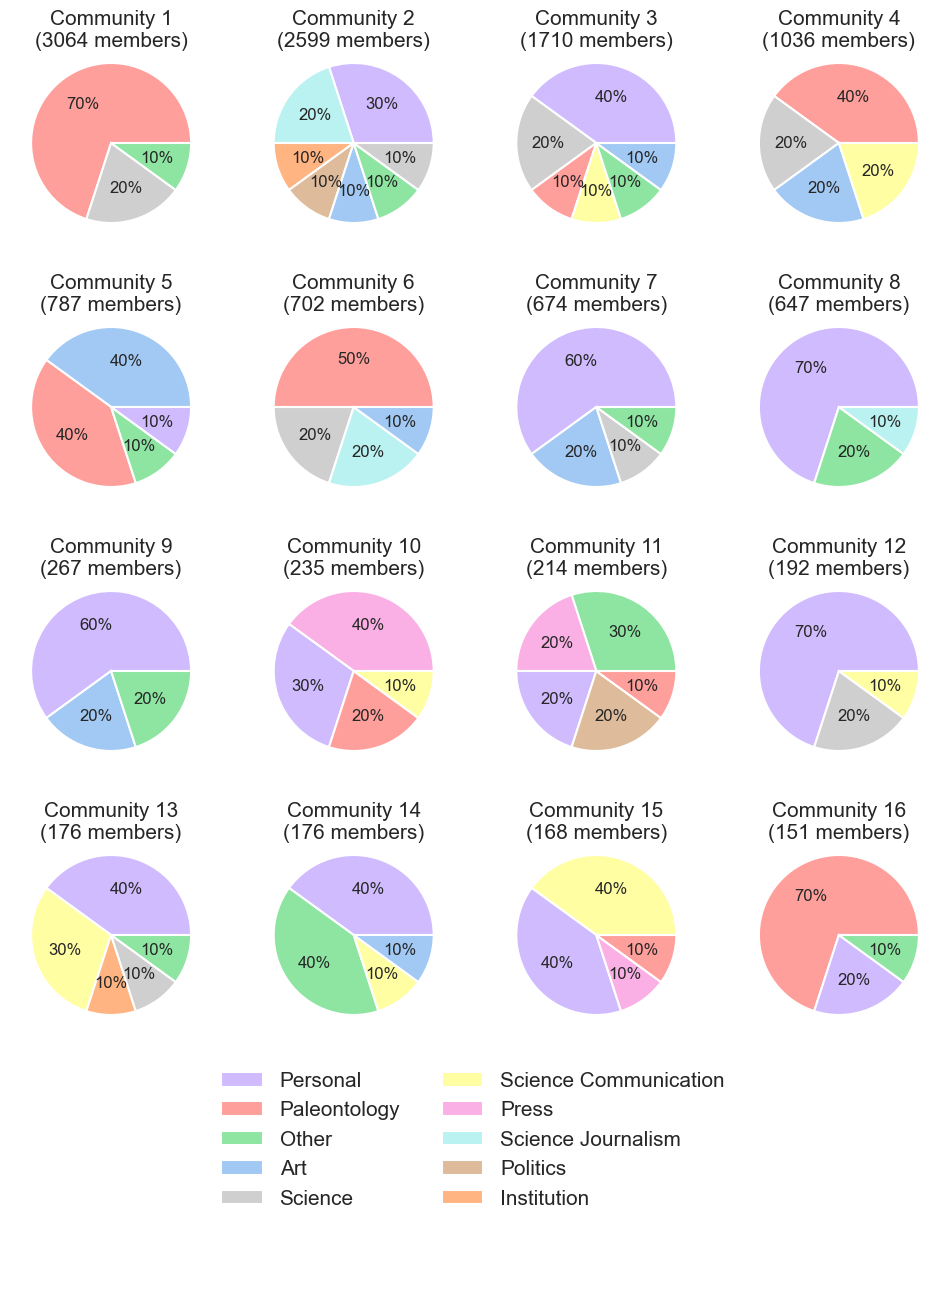

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('talk')
sns.set_style('ticks')

#define Seaborn color palette to use
palette = sns.color_palette('pastel')[:10]
all_labels = sorted(df.label.unique())
colours = { l:c for l,c in zip(all_labels,palette) }
#colours = { l:i for i,l in enumerate(all_labels) }

n_communities = len(comm_sizes)

fig, axs = plt.subplots(5,4,figsize=(12,16))
axs = axs.flatten()

for ax,n in zip(axs,range(n_communities)):
    #define data
    d = df.query('community == @n').label.value_counts()
    data   = d.values
    labels = d.index
    community_size = comm_sizes[n]

    #create pie chart
    w,l,p = ax.pie(data,
                   #labels=labels,
                   labels=None,
                   colors=[colours[key] for key in labels],
                   autopct='%.0f%%',  textprops={'fontsize': 12}, pctdistance=0.6,
                   labeldistance=1.1)

    ax.set_title(f'Community {n+1}\n({community_size} members)',fontsize=15)
    ax.axis('equal')
    
ax = axs[-3]
d = df.label.value_counts()
data   = d.values
labels = d.index
ax.pie(data, labels=None, colors=[colours[key] for key in labels], radius=0.01)
ax.legend(labels, loc=(-0.3,0.4), fontsize=15, framealpha=1, frameon=False, ncols=2)

axs[-4].axis('off')
axs[-2].axis('off')
axs[-1].axis('off')

plt.subplots_adjust(hspace=0.5)
#plt.tight_layout()

plt.savefig('community_composition.png',dpi=200)
plt.show()